In [1]:
import sys
import time
import pandas as pd
from sklearn import model_selection
from sklearn import ensemble, linear_model, svm, metrics, cluster, tree
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
import scipy
import os
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import preprocessing
from sklearn.feature_selection import *
from sklearn.model_selection import GridSearchCV, KFold

start_time = time.time()

n_cv = 5
n_jobs = 4
random_state = 3111696
d_set = "Galaxy215-[rTRAIL.csv].tabular"

print("Loading dataset: %s" % d_set)
df = pd.read_csv("depmap/" + d_set, sep="\t")
columns = list(df.columns.values)
label = df[columns[-1]].copy()
data = df.drop(columns[-1], axis=1)
print(data.shape)
print(label.shape)
print("Dataset loaded")

Loading dataset: Galaxy215-[rTRAIL.csv].tabular
(604, 48117)
(604,)
Dataset loaded


In [2]:
print('Feature extraction started...')

clf = XGBRegressor(n_estimators=100, random_state=random_state)
clf = clf.fit(data, label)
model = SelectFromModel(clf, prefit=True)
extracted_features_data = model.transform(data)

print("Size low dimensional data: ", extracted_features_data.shape)
print('Feature extraction finished')

Feature extraction started...
Size low dimensional data:  (604, 454)
Feature extraction finished


['TSPAN6 (ENSG00000000003)', 'DPM1 (ENSG00000000419)', 'SCYL3 (ENSG00000000457)', 'SAMD10 (ENSG00000130590)', 'CFLAR (ENSG00000003402)', 'CCDC101 (ENSG00000176476)', 'APCDD1L (ENSG00000198768)', 'CASP8 (ENSG00000064012)', 'MEX3C (ENSG00000176624)', 'CFH (ENSG00000000971)']


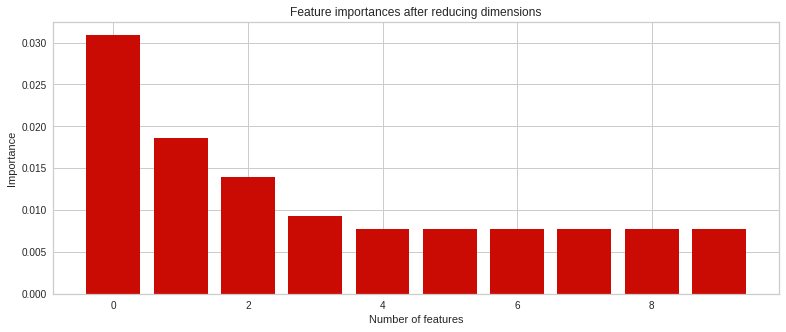

Size low dimensional data:  (604, 10)


In [7]:
f_importances = clf.feature_importances_
indices_ld = np.argsort(f_importances)[::-1]
topk = 10

indices_ld = indices_ld[:topk]

selected_col_names = [columns[col_id] for col_id in indices_ld]

print(selected_col_names)

plt.figure(figsize=(13, 5))
plt.title("Feature importances after reducing dimensions")
plt.bar(range(topk), f_importances[indices_ld], color="r")
plt.xlabel("Number of features")
plt.ylabel("Importance")
plt.grid(True)
plt.show()

new_data = np.zeros([data.shape[0], topk])
for idx in range(topk):
    new_data[:, idx] = data.iloc[:, indices_ld[idx]].values
print("Size low dimensional data: ", new_data.shape)


Feature ranking using Pearson correlation


/home/anupkumar/miniconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


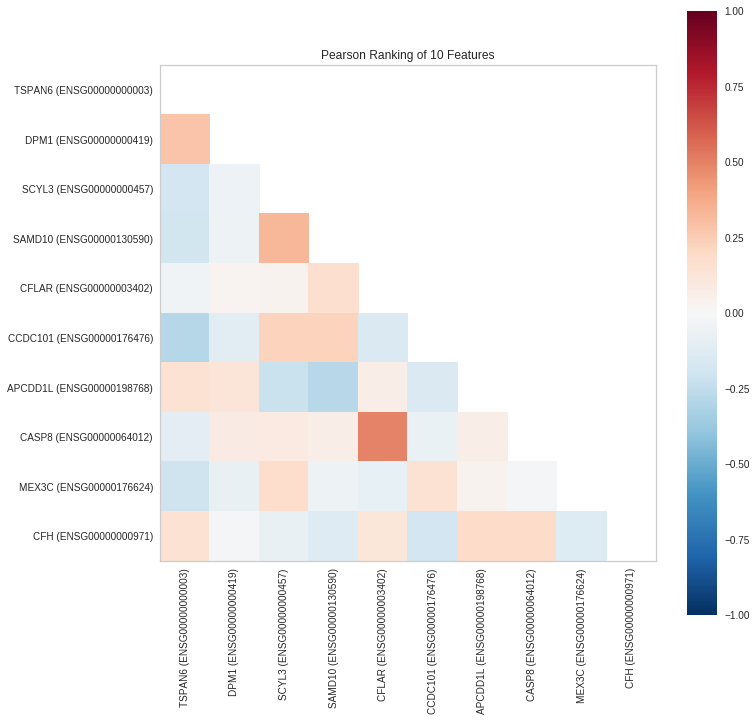

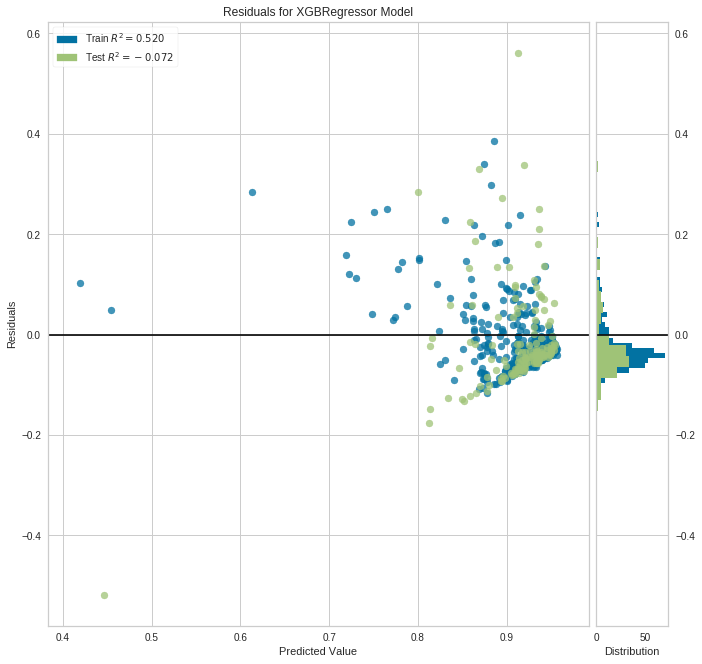

In [61]:
# YellowBrick viz
from yellowbrick.features import Rank2D
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.model_selection import train_test_split


transformed_df = data[selected_col_names]

# compute feature covariance
print("Feature ranking using Pearson correlation")
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(transformed_df)
visualizer.size = [800, 800]
visualizer.poof()


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    transformed_df, label, test_size=0.25
)
model = XGBRegressor(n_estimators=30)
visualizer_residual = ResidualsPlot(model)
visualizer_residual.fit(X_train, y_train)
visualizer_residual.score(X_test, y_test)
visualizer_residual.size = [800, 800]
visualizer_residual.poof() 

